Autograd Introduction


In [1]:
import torch

In [2]:
x = torch.rand(3, requires_grad = True)
print(x)

tensor([0.1884, 0.7729, 0.3795], requires_grad=True)


In [3]:
y = x+2
print(y)

tensor([2.1884, 2.7729, 2.3795], grad_fn=<AddBackward0>)


In [4]:
z = y*y*2
print(z)

z = z.mean()
print(z)

tensor([ 9.5783, 15.3780, 11.3239], grad_fn=<MulBackward0>)
tensor(12.0934, grad_fn=<MeanBackward0>)


In [5]:
z.backward()
print(x.grad)

tensor([2.9179, 3.6972, 3.1726])


In [6]:
 #prevent tracking gradients
 # 3 options
 
# x.requires_grad_(False)
# print(x)

# y = x.detach()
# print(y)

with torch.no_grad():
  y = x+2
  print(y)


tensor([2.1884, 2.7729, 2.3795])


Basic steps of a neural networks
1.   Forward Pass
2.   Compute Local Gradient
3.   Backward Pass

In [7]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

#Forward Pass and compute loss
y_hat = w*x
loss = (y_hat - y)**2

print(loss)

#Backward Pass

loss.backward()

print(w.grad)

## Update weight and continue



tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


Implementing Linear Regression without Autograd

In [8]:
import numpy as np

#f=2*x

X = np.array([1,2,3,4],dtype=np.float32)
Y = np.array([2,4,6,8],dtype=np.float32)

w = 0

#model prediction
def forward(x):
  return w*x

#loss = MSE
def loss(y,y_pred):
  return ((y_pred-y)**2).mean()

#gradient
#MSE = 1/N * (w*x-y)**2
#dJ/dw = 1/N 2x - y

def gradient(x,y,y_pred):
  return np.dot(2*x, y_pred-y).mean()


print(f'Prediction before training : f(5) = {forward(5):.3f} ')

#Training
learning_rate = 0.01
n_itr = 20

for epoch in range(n_itr):
  #forward pass
  y_pred = forward(X)

  #compute loss
  l = loss(Y,y_pred)

  #gradients
  dw = gradient(X,Y,y_pred)

  #update weights
  w -=(learning_rate * dw)

  if epoch%2 == 0:
    print(f'epoch : {epoch+1} : w = {w: .3f}, loss = {l: .3f} ')

print(f'Prediction after training : f(5) = {forward(5):.3f} ')





Prediction before training : f(5) = 0.000 
epoch : 1 : w =  1.200, loss =  30.000 
epoch : 3 : w =  1.872, loss =  0.768 
epoch : 5 : w =  1.980, loss =  0.020 
epoch : 7 : w =  1.997, loss =  0.001 
epoch : 9 : w =  1.999, loss =  0.000 
epoch : 11 : w =  2.000, loss =  0.000 
epoch : 13 : w =  2.000, loss =  0.000 
epoch : 15 : w =  2.000, loss =  0.000 
epoch : 17 : w =  2.000, loss =  0.000 
epoch : 19 : w =  2.000, loss =  0.000 
Prediction after training : f(5) = 10.000 


Using Autograd


In [9]:
# 1) Design the model (input,output,forward pass)
# 2) Construct the loss and optimizer
# 3) Training Loop  
#    *forward pass : compute predction
#    *backward pass : gradients
#    *update weights

import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

x_test = torch.tensor([5],dtype=torch.float32)
n_samples,n_features = X.shape
print(n_samples,n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size,output_size)

print(f'Prediction before training : f(5) = {model(x_test).item():.3f} ')

#Training
learning_rate = 0.05
n_itr = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_itr):
  #forward pass
  y_pred = model(X)

  #compute loss
  l = loss(Y,y_pred)

  #gradients = backward pass
  l.backward() #dl/dw
  

  #update weights
  optimizer.step()

  optimizer.zero_grad()

  if epoch%10 == 0:
    [w,b] = model.parameters()
    print(f'epoch : {epoch+1} : w = {w[0][0].item(): .3f}, loss = {l: .3f} ')

print(f'Prediction after training : f(5) = {model(x_test).item():.3f} ')


4 1
Prediction before training : f(5) = 5.118 
epoch : 1 : w =  1.658, loss =  6.545 
epoch : 11 : w =  1.824, loss =  0.046 
epoch : 21 : w =  1.849, loss =  0.034 
epoch : 31 : w =  1.870, loss =  0.025 
epoch : 41 : w =  1.888, loss =  0.019 
epoch : 51 : w =  1.904, loss =  0.014 
epoch : 61 : w =  1.917, loss =  0.010 
epoch : 71 : w =  1.929, loss =  0.008 
epoch : 81 : w =  1.939, loss =  0.006 
epoch : 91 : w =  1.947, loss =  0.004 
Prediction after training : f(5) = 9.905 


Linear Regression 

epoch 10, loss = 4383.021
epoch 20, loss = 3271.298
epoch 30, loss = 2466.546
epoch 40, loss = 1883.402
epoch 50, loss = 1460.436
epoch 60, loss = 1153.379
epoch 70, loss = 930.285
epoch 80, loss = 768.073
epoch 90, loss = 650.047
epoch 100, loss = 564.117


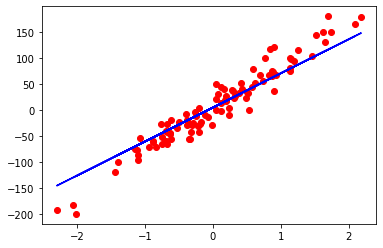

In [10]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

X_numpy, Y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)  

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

Y = Y.view(Y.shape[0],1)

n_samples,n_features = X.shape

input_size = n_features
output_size = 1
model =  nn.Linear(input_size,output_size)

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

num_epochs = 100

for epoch in range(num_epochs):

  y_pred = model(X)
  loss = criterion(y_pred,Y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%10 == 0:
    print(f'epoch {epoch+1}, loss = {loss.item():.3f}')

#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy,Y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()





Logistic Regression

In [11]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

#  Model
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

# Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.6984
epoch: 20, loss = 0.5535
epoch: 30, loss = 0.4676
epoch: 40, loss = 0.4112
epoch: 50, loss = 0.3712
epoch: 60, loss = 0.3409
epoch: 70, loss = 0.3170
epoch: 80, loss = 0.2976
epoch: 90, loss = 0.2813
epoch: 100, loss = 0.2675
accuracy: 0.8947


Dataset and DataLoader - Batch Training


In [12]:
!git clone https://github.com/shaheer1995/pytorch_tutorials

Cloning into 'pytorch_tutorials'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [13]:
data_path = "/content/pytorch_tutorials/data/wine/wine.csv"

In [14]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):

  def __init__(self):
    xy = np.loadtxt(data_path,delimiter=",",dtype=np.float32,skiprows=1)
    self.x = torch.from_numpy(xy[:,1:])
    self.y = torch.from_numpy(xy[:,[0]])
    self.n_samples = xy.shape[0]

  def __getitem__(self,index):
    return self.x[index],self.y[index]
  def __len__(self):
    return self.n_samples

dataset = WineDataset()
dataloader = DataLoader(dataset=dataset,batch_size=4,shuffle=True,num_workers=2)

# dataiter = iter(dataloader)
# data = dataiter.next()
# features,labels = data
# print(features,labels)

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples,n_iterations)

for epoch in range(num_epochs):
  for i,(inputs, lables) in enumerate(dataloader):
    if (i+1)%5 == 0:
      print(f'epoch : {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')



178 45
epoch : 1/2, step 5/45, inputs torch.Size([4, 13])
epoch : 1/2, step 10/45, inputs torch.Size([4, 13])
epoch : 1/2, step 15/45, inputs torch.Size([4, 13])
epoch : 1/2, step 20/45, inputs torch.Size([4, 13])
epoch : 1/2, step 25/45, inputs torch.Size([4, 13])
epoch : 1/2, step 30/45, inputs torch.Size([4, 13])
epoch : 1/2, step 35/45, inputs torch.Size([4, 13])
epoch : 1/2, step 40/45, inputs torch.Size([4, 13])
epoch : 1/2, step 45/45, inputs torch.Size([2, 13])
epoch : 2/2, step 5/45, inputs torch.Size([4, 13])
epoch : 2/2, step 10/45, inputs torch.Size([4, 13])
epoch : 2/2, step 15/45, inputs torch.Size([4, 13])
epoch : 2/2, step 20/45, inputs torch.Size([4, 13])
epoch : 2/2, step 25/45, inputs torch.Size([4, 13])
epoch : 2/2, step 30/45, inputs torch.Size([4, 13])
epoch : 2/2, step 35/45, inputs torch.Size([4, 13])
epoch : 2/2, step 40/45, inputs torch.Size([4, 13])
epoch : 2/2, step 45/45, inputs torch.Size([2, 13])


Softmax and Cross entropy

In [15]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy : ', outputs)

y = torch.tensor([2.0,1.0,0.1])
output = torch.softmax(y,dim=0)
print(output)

def cross_entropy(actual,predicted):
  loss = -np.sum(actual*np.log(predicted))
  return loss

Y = np.array([1,0,0])

Y_pred_good = np.array([0.7,0.2,0.1])
Y_pred_bad = np.array([0.1,0.3,0.6])

l1 = cross_entropy(Y,Y_pred_good)
l2 = cross_entropy(Y,Y_pred_bad)

print(f'Loss 1 numpy : {l1:.3f}')
print(f'Loss 2 numpy : {l2:.3f}')

softmax numpy :  [0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])
Loss 1 numpy : 0.357
Loss 2 numpy : 2.303


In [16]:
import torch
import torch.nn as nn
import numpy as np

loss = nn.CrossEntropyLoss()

Y = torch.tensor([2,0,1])

Y_pred_good = torch.tensor([[0.0,1.0,2.1],[2.0,1.0,0.1],[0.0,3.0,0.1]])
Y_pred_bad = torch.tensor([[2.5,2.0,0.3],[0.1 ,2.0,2.3],[0.1,3.0,0.1]])

l1 = loss(Y_pred_good,Y)
l2 = loss(Y_pred_bad,Y)

print(f'Loss 1 numpy : {l1.item():.3f}')
print(f'Loss 2 numpy : {l2.item():.3f}')

_, prediction1 = torch.max(Y_pred_good,1)
_, prediction2 = torch.max(Y_pred_bad,1)

print(prediction1)
print(prediction2)


Loss 1 numpy : 0.297
Loss 2 numpy : 1.887
tensor([2, 0, 1])
tensor([0, 2, 1])


Binary Classification

In [ ]:
import torch
import torch.nn as nn

class NeuralNet1(nn.Module):

  def __init__(self,input_size,hidden_size):
    super(NeuralNet2,self).__init__()
    self.linear1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size,1)

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    y_pred = torch.sigmoid(out)
    return y_pred

model = NeuralNet1(input_size=28*28, hidden_size = 5)
criterion = nn.BCELoss()


Multiclass Classification

In [18]:
import torch
import torch.nn as nn

class NeuralNet2(nn.Module):

  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet2,self).__init__()
    self.linear1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    return out

model = NeuralNet2(input_size=28*28, hidden_size = 5, num_classes = 3)
criterion = nn.CrossEntropyLoss()




